<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [17]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/Housing.csv")

# EDA

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Conversion

In [20]:
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == "yes" else 0)

<ipython-input-20-d9b35aaafe1a>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == "yes" else 0)


In [21]:
# One-hot encoding for 'furnishingstatus'
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

# Check Outliers

In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [23]:
for col in ["price", "area", "parking"]:
    df = remove_outliers(df, col)

# Duplicates

In [24]:
duplicate_count = df.duplicated().sum()
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished


# Normalization

In [26]:
scaler = MinMaxScaler()
numeric_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# VIsualization

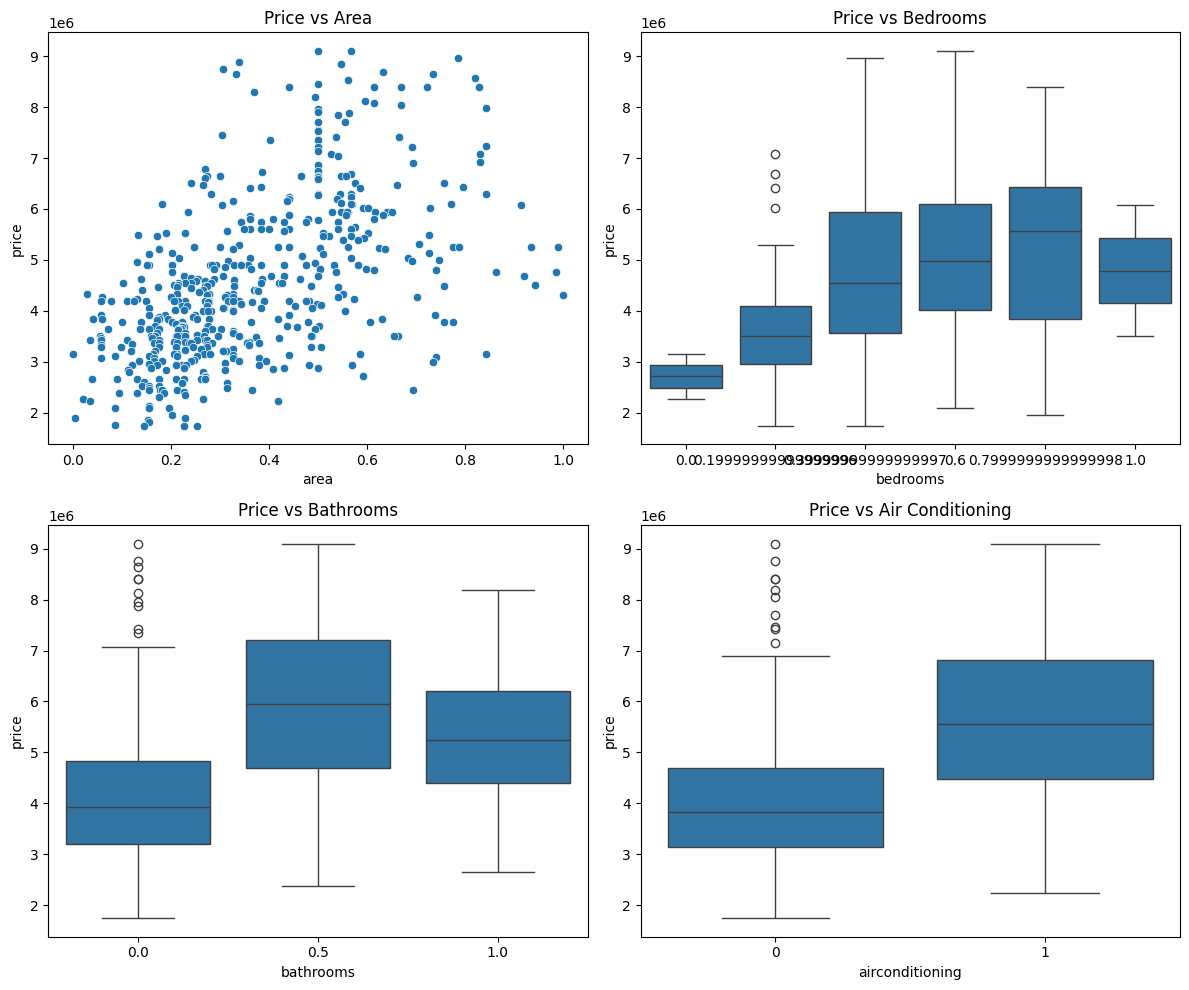

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(ax=axes[0, 0], x=df["area"], y=df["price"]).set(title="Price vs Area")
sns.boxplot(ax=axes[0, 1], x=df["bedrooms"], y=df["price"]).set(title="Price vs Bedrooms")
sns.boxplot(ax=axes[1, 0], x=df["bathrooms"], y=df["price"]).set(title="Price vs Bathrooms")
sns.boxplot(ax=axes[1, 1], x=df["airconditioning"], y=df["price"]).set(title="Price vs Air Conditioning")
plt.tight_layout()
plt.show()

In [28]:
# Larger homes and premium features generally lead to higher prices.